In [2]:
# imports libraries
from ultralytics import YOLO
import torch
import cv2 as cv
import matplotlib.pyplot as plt

import sys
parent_dir = "/".join(sys.path[0].split("/")[:-1])
sys.path.append(parent_dir)

from src.data.visualize import drawRects


image 1/1 /home/osurasenith/Projects/third-umpire-decision-automation/backend/experiments/data/Cricket-Semantic-Segmentation/object-detect/images/train/2022-08-24 (118).png: 384x640 1 Batsmen, 76.0ms
Speed: 0.8ms preprocess, 76.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


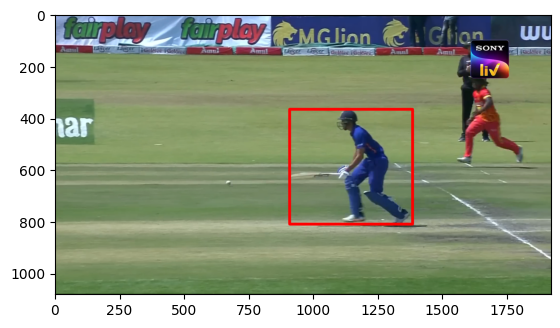

In [18]:
# Loads the model
best_weights_path = "../../training-jobs/detect/object-detect-dataset-1/weights/best.pt"
model = YOLO(best_weights_path)

image_path = "../data/Cricket-Semantic-Segmentation/object-detect/images/train/2022-08-24 (118).png"
# image_path = "../data/test/Runout-scenario-in-a-cricket-match.jpg"
# image_path = "../data/test/Screenshot 2023-03-30 081506.jpg"

# makes the prediction
res = model.predict(image_path)

# create box annotations
result = res[0].boxes
cls = result.cls
xywh = result.xywhn
cls_col = cls.reshape((-1, 1))
annotations = torch.cat((cls_col, xywh), dim=1).tolist()

# load the image
img = cv.cvtColor(cv.imread(image_path), cv.COLOR_BGR2RGB)

# draw the annotations
drawn_img = drawRects(img, annotations)

# show the drawn image
plt.imshow(drawn_img)
plt.show()